# Tracé du champ température à 2m du modèle AROME avec Python

Import de la bibliothèque du centre européen [ecCodes](https://software.ecmwf.int/wiki/display/ECC/ecCodes+Home). Au moment d'écrire ceci cette bibliothèque n'est pas compatible Python 3.

In [1]:
import eccodes as ec

Import de la bibliothèque [NumPY](http://www.numpy.org/) pour la manipulation de données numériques à haute performance

In [2]:
import numpy as np

Import de [Matplotlib](https://matplotlib.org/), la bibliothèque Python de référence pour visualiser des données numérique

In [3]:
import matplotlib.pyplot as plt

Ourverture d'un fichier GRIB de modèle atmosphérique téléchargé depuis le [portail des données publiques de Météo France](https://donneespubliques.meteofrance.fr/?fond=produit&id_produit=131&id_rubrique=51).

In [4]:
fp = open("AROME_0.01_SP1_12H_201801101200.grib2")

On s'assure d'être au début du fichier

In [5]:
fp.seek(0)

Parcours des messages contenus dans le fichier GRIB jusqu'à trouver celui sont le nom abbrégé est `2t`.

In [6]:
while True:
    grib_id = ec.codes_grib_new_from_file(fp)
    short_name = ec.codes_get(grib_id, 'shortName')
    if short_name == '2t':
        break

Le message contient la première latitude, la dernière latitude ainsi que le nombre de latitudes de la grille. On utilise la fonction `linspace` de NumpPy pour créer un tableau contenant toutes les latitudes.

In [7]:
miny = round(ec.codes_get(grib_id, 'latitudeOfFirstGridPointInDegrees'), 2)
maxy = round(ec.codes_get(grib_id, 'latitudeOfLastGridPointInDegrees'), 2)
numy = ec.codes_get(grib_id, 'Nj')
latitudes = np.linspace(miny, maxy, numy)

Même opération pour les longitudes.

In [8]:
minx = round(ec.codes_get(grib_id, 'longitudeOfFirstGridPointInDegrees'), 2) - 360
maxx = round(ec.codes_get(grib_id, 'longitudeOfLastGridPointInDegrees'), 2)
numx = ec.codes_get(grib_id, 'Ni')
longitudes = np.linspace(minx, maxx, numx)

ecCodes nous renvoie un tableau de valeurs à une seule dimension dans lequel les bandes horizontales sont à la suite les unes des autres. On transforme ça en tableau à deux dimensions avec `reshape`.

In [9]:
values = ec.codes_get_values(grib_id)
values = np.ma.array(values, mask=values==9999)
values = np.reshape(values, (len(latitudes), len(longitudes)))

Nous voilà enfin prêts à effectuer notre tracé !

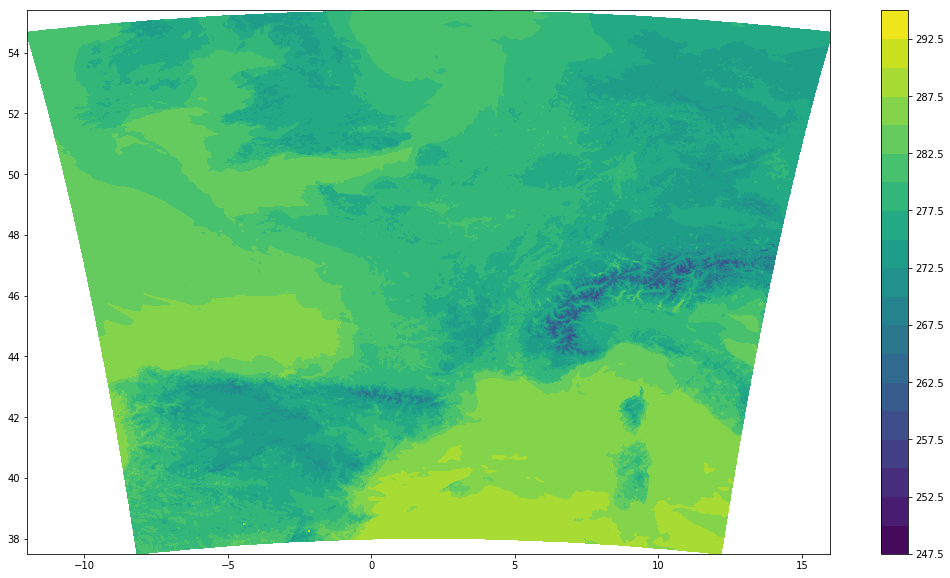

In [10]:
%matplotlib inline

plt.figure(figsize=(18,10))    
plt.contourf(longitudes, latitudes, values, 20)
plt.colorbar()
plt.show();